[*********************100%***********************]  2 of 2 completed


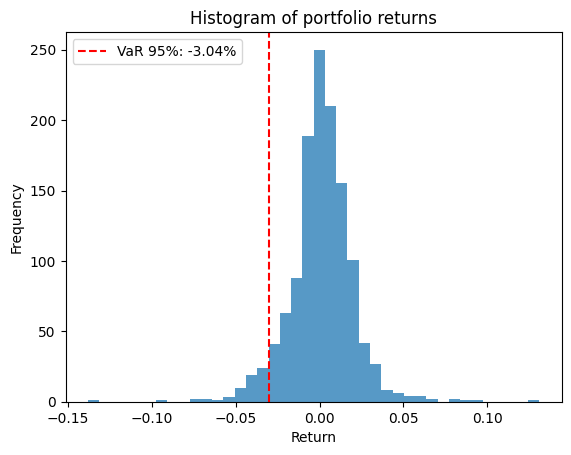

VaR 95%: -3.04%


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set the tickers and weights for your portfolio
tickers = ['AAPL', 'MSFT']
weights = np.array([0.5, 0.5])
start = '2018-01-01'
end = '2023-01-01'

# Download historical data
data = yf.download(tickers, start=start, end=end)['Adj Close']

# Calculate daily portfolio returns
returns = data.pct_change().dropna()
portfolio_returns = returns.dot(weights)

# Compute the mean and standard deviation of the portfolio returns
mean = np.mean(portfolio_returns)
std_dev = np.std(portfolio_returns)

# Calculate VaR(95%)
confidence_level = 0.05
VaR_95 = norm.ppf(confidence_level, mean, std_dev)

# Plot the histogram of portfolio returns
plt.hist(portfolio_returns, bins=40, alpha=0.75)
plt.axvline(x=VaR_95, color='r', linestyle='--', label='VaR 95%: {0:.2f}%'.format(VaR_95*100))
plt.title('Histogram of portfolio returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

# Print the VaR(95%)
print('VaR 95%: {0:.2f}%'.format(VaR_95*100))
